# Your name: Vincent Chen
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [0]:
# import packages 
import numpy as np
import pandas as pd
import statsmodels as sample_data
from sklearn.impute import SimpleImputer
import datetime as dt
import matplotlib.pyplot as plt


# Data File Reading Section
## Write code to read in data from external sources here

In [14]:
#read datasets
df=pd.read_csv('data.csv',encoding = 'unicode_escape')
df.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [15]:
# Your code for this section here ...
print(df.describe)
print(df.shape)
print(df.count())
print(df.isnull().sum())
print(df.info())
print(df.head(10))
print(df.tail(10))

<bound method NDFrame.describe of        stn_code       sampling_date  ... pm2_5        date
0           150  February - M021990  ...   NaN  1990-02-01
1           151  February - M021990  ...   NaN  1990-02-01
2           152  February - M021990  ...   NaN  1990-02-01
3           150     March - M031990  ...   NaN  1990-03-01
4           151     March - M031990  ...   NaN  1990-03-01
...         ...                 ...  ...   ...         ...
435737     SAMP            24-12-15  ...   NaN  2015-12-24
435738     SAMP            29-12-15  ...   NaN  2015-12-29
435739      NaN                 NaN  ...   NaN         NaN
435740      NaN                 NaN  ...   NaN         NaN
435741      NaN                 NaN  ...   NaN         NaN

[435742 rows x 13 columns]>
(435742, 13)
stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                      

## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [0]:
# Cleaning up the data

#dropping columns that aren't required

# ... your code here
df2=df.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'],axis=1)


# dropping rows where no date is available

# ... your code here
df3=df2[pd.notnull(df2['date'])]

In [17]:
# displaying final columns (data.columns)

# ... your code here
df3.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [18]:
# ... Your code here
types = { "Residential": "R", "Residential and others": "RO", 
         "Residential, Rural and other Areas": "RRO", "Industrial Area": "I",
         "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", 
         "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }

df3.type = df3.type.replace(types)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
# Display top 10 records after codification of 'types'
# ... Your code here
df3.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [20]:
# ... Your code here
df3['date']=pd.to_datetime(df3['date'])
df3['year']=df3['date'].dt.year
df3.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [21]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

# ... your code here

#df3['so2']=df3['so2'].fillna(df3['so2'].mean())
#df3['no2']=df3['no2'].fillna(df3['no2'].mean())
#df3['rspm']=df3['rspm'].fillna(df3['rspm'].mean())
#df3['spm']=df3['spm'].fillna(df3['spm'].mean())
#df3['pm2_5']=df3['pm2_5'].fillna(df3['pm2_5'].mean())
#df3.info()


imp=SimpleImputer(missing_values=np.nan,strategy='mean')

imp = imp.fit(df3[['so2']])
df3['so2'] = imp.transform(df3[['so2']]).ravel()
imp = imp.fit(df3[['no2']])
df3['no2'] = imp.transform(df3[['no2']]).ravel()
imp = imp.fit(df3[['rspm']])
df3['rspm'] = imp.transform(df3[['rspm']]).ravel()
imp = imp.fit(df3[['spm']])
df3['spm'] = imp.transform(df3[['spm']]).ravel()
imp = imp.fit(df3[['pm2_5']])
df3['pm2_5'] = imp.transform(df3[['pm2_5']]).ravel()
df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
state       435735 non-null object
location    435735 non-null object
type        435735 non-null object
so2         435735 non-null float64
no2         435735 non-null float64
rspm        435735 non-null float64
spm         435735 non-null float64
pm2_5       435735 non-null float64
date        435735 non-null datetime64[ns]
year        435735 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

state
Nagaland                 2.000000
Mizoram                  2.000000
Meghalaya                2.000000
Arunachal Pradesh        2.500000
Himachal Pradesh         3.000000
Kerala                   4.200000
Telangana                5.000000
Odisha                   5.000000
Jammu & Kashmir          5.000000
Andhra Pradesh           5.000000
Goa                      6.000000
Rajasthan                6.300000
Delhi                    6.300000
Assam                    6.500000
Puducherry               7.266667
Daman & Diu              7.600000
Chandigarh               7.950000
West Bengal              8.000000
Dadra & Nagar Haveli     8.400000
Karnataka               10.000000
Uttar Pradesh           10.000000
Tamil Nadu              10.000000
Punjab                  10.300000
Manipur                 10.829428
Bihar                   10.829428
Haryana                 10.829428
Madhya Pradesh          10.829428
Chhattisgarh            12.500000
Maharashtra             13.000000
Gujarat 

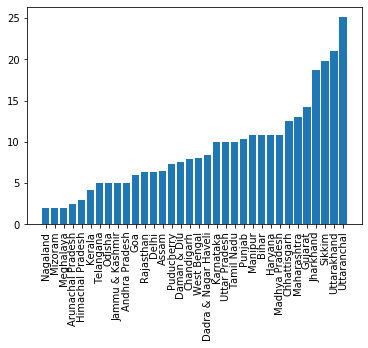

In [22]:
# ... Your code here
so2=df3.groupby('state')['so2'].median().sort_values(ascending=True)
print(so2)
plt.bar(so2.index,so2)
plt.xticks(rotation=90)
plt.show()
#Observation: Uttaranchal has the highest median SO2 level and three states including
#Meghkaya, Mizoram and Nagaland have the lowest median SO2 level from the data.

### no2 status

state
Arunachal Pradesh        5.000000
Mizoram                  5.000000
Nagaland                 7.000000
Meghalaya               10.000000
Goa                     11.600000
Puducherry              13.000000
Jammu & Kashmir         13.000000
Himachal Pradesh        13.900000
Kerala                  14.000000
Assam                   14.000000
Odisha                  16.000000
Daman & Diu             17.600000
Chandigarh              18.000000
Dadra & Nagar Haveli    18.000000
Madhya Pradesh          19.200000
Manipur                 19.800000
Andhra Pradesh          20.000000
Tamil Nadu              21.000000
Karnataka               21.200000
Chhattisgarh            21.500000
Telangana               22.000000
Haryana                 22.750000
Gujarat                 23.000000
Uttarakhand             25.809659
Rajasthan               26.000000
Sikkim                  26.800000
Uttar Pradesh           27.000000
Uttaranchal             27.500000
Punjab                  28.300000
Maharash

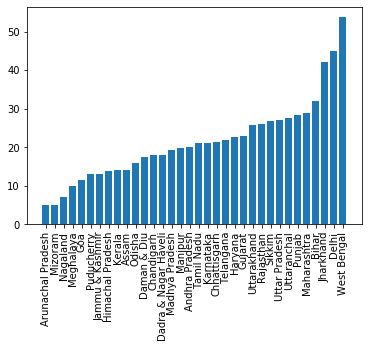

In [23]:
# ... Your code here
no2=df3.groupby('state')['no2'].median().sort_values(ascending=True)
print(no2)
plt.bar(no2.index,no2)
plt.xticks(rotation=90)
plt.show()
#Observation: West Bengal has the highest NO2 level and is followed by Delhi and Jhankhand,
#while Mizoram and Arunachal Pradesh are enjoying the lowset NO2 level of all states.

### rspm status

state
Sikkim                   32.000000
Mizoram                  40.000000
Puducherry               46.000000
Kerala                   49.000000
Goa                      56.000000
Meghalaya                57.000000
Tamil Nadu               59.000000
Manipur                  61.000000
Karnataka                63.000000
Arunachal Pradesh        74.500000
Andhra Pradesh           76.000000
Assam                    77.000000
Nagaland                 78.000000
Telangana                80.000000
Odisha                   81.000000
Himachal Pradesh         90.000000
Chandigarh               90.000000
Dadra & Nagar Haveli     91.000000
Gujarat                  95.000000
West Bengal              96.000000
Maharashtra              96.000000
Chhattisgarh            108.833091
Madhya Pradesh          108.833091
Bihar                   108.833091
Daman & Diu             108.833091
Uttaranchal             112.000000
Rajasthan               112.000000
Jammu & Kashmir         116.000000
Uttarakhand   

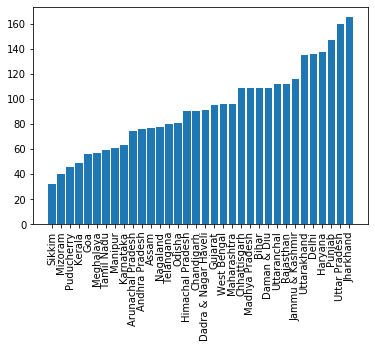

In [27]:
# ... Your code here
rspm=df3.groupby('state')['rspm'].median().sort_values(ascending=True)
print(rspm)
plt.bar(rspm.index,rspm)
plt.xticks(rotation=90)
plt.show()
#Observation: Jharkhand and Uttar Pradesh have the highest rspm level and Sikkim and 
#Mizoram have the lowest level of rspm.

### spm status

state
Sikkim                   75.00000
Manipur                 120.50000
Puducherry              191.00000
Goa                     199.00000
Daman & Diu             200.50000
Andhra Pradesh          220.78348
Meghalaya               220.78348
Mizoram                 220.78348
Nagaland                220.78348
Odisha                  220.78348
Punjab                  220.78348
Tamil Nadu              220.78348
Telangana               220.78348
Uttar Pradesh           220.78348
Uttarakhand             220.78348
Rajasthan               220.78348
Maharashtra             220.78348
Kerala                  220.78348
Karnataka               220.78348
Jharkhand               220.78348
Jammu & Kashmir         220.78348
Himachal Pradesh        220.78348
Haryana                 220.78348
Gujarat                 220.78348
Dadra & Nagar Haveli    220.78348
Chhattisgarh            220.78348
Chandigarh              220.78348
Bihar                   220.78348
Assam                   220.78348
Arunacha

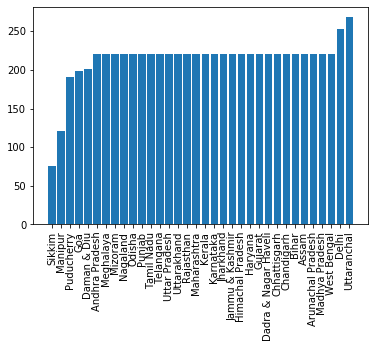

In [28]:
# ... Your code here
spm=df3.groupby('state')['spm'].median().sort_values(ascending=True)
print(spm)
plt.bar(spm.index,spm)
plt.xticks(rotation=90)
plt.show()
#While Uttaranchal and Sikkim have the highest and lowest level of spm seperately,
#there remains too much data in the same median level, indicating the possibility that 
#they are all missing values which are filled with mean before. 

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [29]:
# ... Your code here
df4=df3[df3['state']=='Andhra Pradesh'].groupby('year').median()
df4.head(5)

,so2,no2,rspm,spm,pm2_5
year,,,,,
1990,5.60,13.6,108.833091,179.00000,40.791467
1991,8.25,12.8,108.833091,141.50000,40.791467
1992,12.40,27.6,108.833091,192.00000,40.791467
1993,6.00,11.4,108.833091,220.78348,40.791467
1994,8.70,14.2,108.833091,220.78348,40.791467


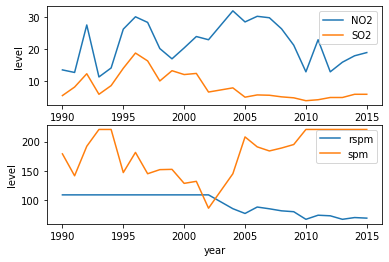

In [30]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# ... Your code here
plt.subplot(2, 1, 1) 
plt.plot(df4.index,df4.no2,label='NO2')
plt.plot(df4.index,df4.so2,label='SO2')
plt.ylabel('level')
plt.legend()
plt.subplot(2, 1, 2) 
plt.plot(df4.index,df4.rspm,label='rspm')
plt.plot(df4.index,df4.spm,label='spm')
plt.legend()
plt.xlabel('year')
plt.ylabel('level')
plt.show()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....

*The NO2 and SO2 level in this area shares a similar pattern before year 1998, then SO2 level has dropped to a moderately low level, while the NO2 level keeps high after year 1998.*

*The rspm level stays at the same value until year 2002, it might be due to the lack of data in older days and the data is filled with mean. The spm level has been fluctuated during the first 20 years and reaches its highest level again since year 2010.*
